In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [19]:
df=pd.read_csv('Heart (3).csv')

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [21]:
#Seperate data
y =df.target.values
x1=df.drop(["target"],axis=1)

In [22]:
#Normalization 
x = (x1 - np.min(x1))/(np.max(x1)-np.min(x1)).values

In [23]:
#Split For Train and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [24]:
#Create-KNN-model
from sklearn.neighbors import KNeighborsClassifier

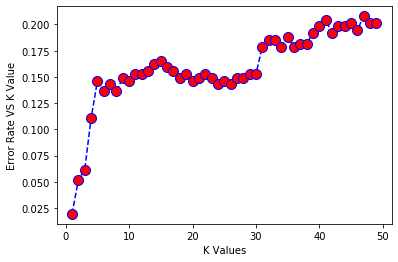

In [26]:
#Find Optimum K value
scores = []
error_rate=[]
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))
    
plt.plot(range(1,50),error_rate,color="blue",linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel("K Values")
plt.ylabel("Error Rate VS K Value")
plt.show()

In [27]:
knn = KNeighborsClassifier(n_neighbors = 6) #n_neighbors = K value
start=time.time()
knn.fit(x_train,y_train) #learning model
end=time.time()
run_time=(end-start)*1000
prediction = knn.predict(x_test)
print("{}-NN Score: {}".format(25,knn.score(x_test,y_test)))
KNNscore = knn.score(xtest,ytest)

25-NN Score: 0.8636363636363636


In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
l=confusion_matrix(prediction,ytest)

In [30]:
precision=(l[1][1]/(l[1][1] + l[0][1]))
recall=(l[1][1]/(l[1][0] + l[1][1]))
accuracy=((l[0][0]+l[1][1])/(l[0][0]+l[0][1]+l[1][0]+l[1][1]))
f1_score=2*((precision*recall)/(precision+recall))

In [31]:
print("Accuracy :",accuracy)
print('\n')
print("Precision :",precision)
print('\n')
print("Recall :",recall)
print('\n')
print("F1score :",f1_score)
print('\n')
print('Running time :',run_time)
print('\nConfusion matrix')
print(l)

Accuracy : 0.8636363636363636


Precision : 0.8322147651006712


Recall : 0.8794326241134752


F1score : 0.8551724137931035


Running time : 2.9556751251220703

Confusion matrix
[[142  25]
 [ 17 124]]


In [ ]:
#Code after optimisation

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(df.drop('target',axis=1))

In [ ]:
scaled_features=scaler.transform(df.drop('target',axis=1))

In [ ]:
scaled_features

In [ ]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [ ]:
df_feat.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df_feat
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
pred=knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score
from sklearn import metrics

In [ ]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

In [ ]:
error_rate=[]
 
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
l=confusion_matrix(y_test,pred)

In [ ]:
precision=(l[1][1]/(l[1][1] + l[0][1]))
recall=(l[1][1]/(l[1][0] + l[1][1]))
accuracy=((l[0][0]+l[1][1])/(l[0][0]+l[0][1]+l[1][0]+l[1][1]))
f1_score=2*((precision*recall)/(precision+recall))

In [ ]:
print("Accuracy :",accuracy)
print('\n')
print("Precision :",precision)
print('\n')
print("Recall :",recall)
print('\n')
print("F1score :",f1_score)

print('\n')

In [ ]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))